In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

          Datetime  AEP_MW
0  12/31/2004 1:00   13478
1  12/31/2004 2:00   12865
2  12/31/2004 3:00   12577
3  12/31/2004 4:00   12517
4  12/31/2004 5:00   12670 

              Datetime  AEP_MW
121268  1/1/2018 20:00   21089
121269  1/1/2018 21:00   20999
121270  1/1/2018 22:00   20820
121271  1/1/2018 23:00   20415
121272   1/2/2018 0:00   19993 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



# Extract all Data Like Year Month Day Time etc

In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670,12,2004,2004-12-31,05:00:00,53,Friday
2004-12-31 06:00:00,13038,12,2004,2004-12-31,06:00:00,53,Friday
2004-12-31 07:00:00,13692,12,2004,2004-12-31,07:00:00,53,Friday
2004-12-31 08:00:00,14297,12,2004,2004-12-31,08:00:00,53,Friday
2004-12-31 09:00:00,14719,12,2004,2004-12-31,09:00:00,53,Friday


# How many Unique Year do we Have in Dataset 

In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

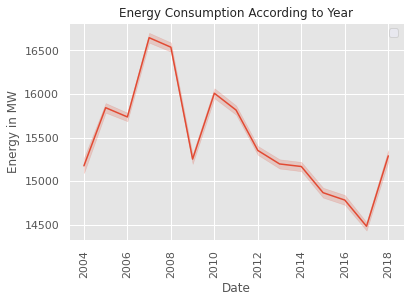

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=df["Year"], y=df["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single str

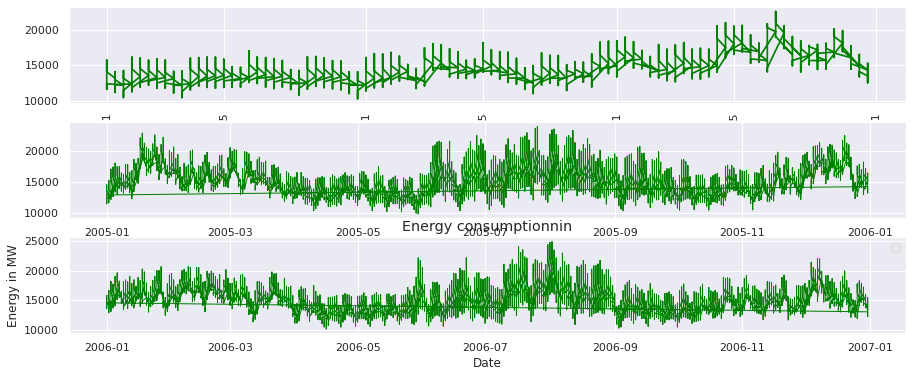

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

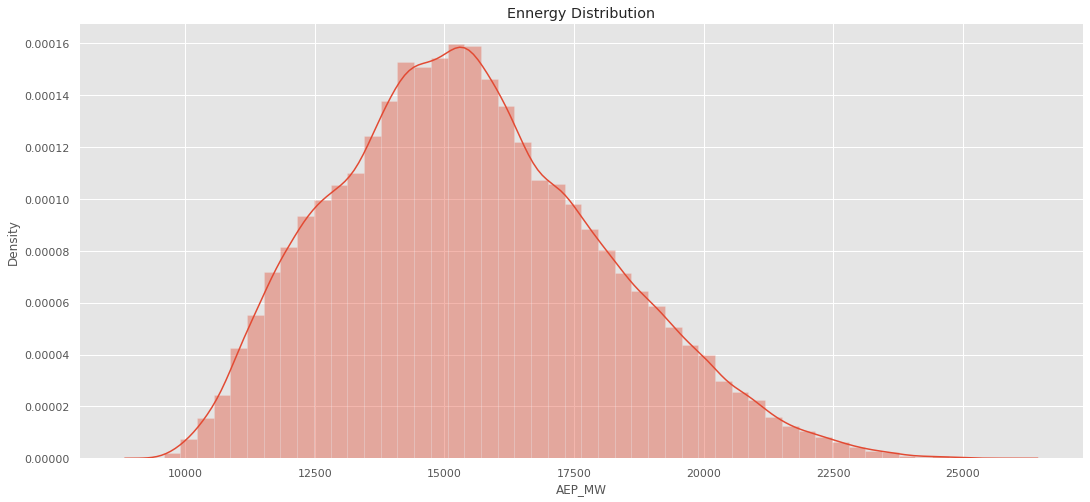

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [ ]:
pd.plotting.register_matplotlib_converters()

In [ ]:
NewDataSet = dataset.resample('D').mean()

In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [ ]:
type(Training_Set.values)

numpy.ndarray

In [ ]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
Train.shape

(4995, 1)

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)


print(Y_Train.shape)

(4935, 1)


# Shape should be Number of [Datapoints , Steps , 1 ]
# we convert into 3-d Vector or #rd Dimesnsion

In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

Model

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 28s 128ms/step - loss: 0.0235
Epoch 2/50
155/155 [==============================] - 20s 129ms/step - loss: 0.0185
Epoch 3/50
155/155 [==============================] - 20s 128ms/step - loss: 0.0178
Epoch 4/50
155/155 [==============================] - 20s 128ms/step - loss: 0.0169
Epoch 5/50
155/155 [==============================] - 20s 129ms/step - loss: 0.0160
Epoch 6/50
155/155 [==============================] - 20s 129ms/step - loss: 0.0155
Epoch 7/50
155/155 [==============================] - 20s 128ms/step - loss: 0.0149
Epoch 8/50
155/155 [==============================] - 25s 164ms/step - loss: 0.0146
Epoch 9/50
155/155 [==============================] - 23s 145ms/step - loss: 0.0127
Epoch 10/50
155/155 [==============================] - 20s 129ms/step - loss: 0.0110
Epoch 11/50
155/155 [==============================] - 20s 128ms/step - loss: 0.0103
Epoch 12/50
155/155 [==============================] - 20s 130ms/step - lo

Test Data

In [ ]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [ ]:
TestData.shape

(100, 4)

In [ ]:
NewDataSet.shape

(5055, 4)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted = sc.inverse_transform(predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]})

Future Predicted

In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13467.170898
1,2018-04-27,12964.000000,12937.157227
2,2018-04-28,12237.583333,14344.965820
3,2018-04-29,12156.791667,13043.351562
4,2018-04-30,13443.500000,12635.003906
...,...,...,...
95,2018-07-30,15368.083333,14870.036133
96,2018-07-31,15180.291667,15636.186523
97,2018-08-01,15151.166667,14940.076172
98,2018-08-02,15687.666667,15180.394531


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


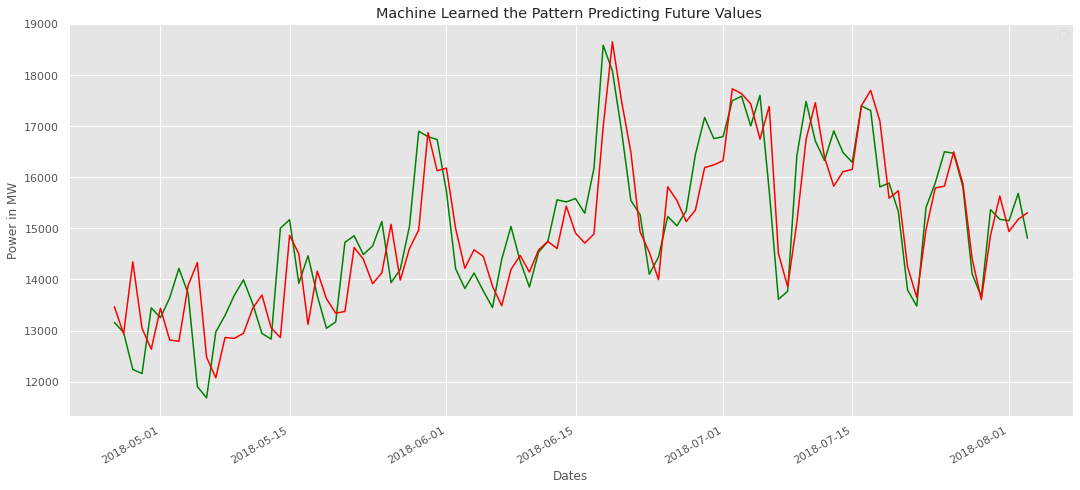

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()